<a href="https://colab.research.google.com/github/dynji/Training/blob/main/Deep_Learning_for_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: How to Prepare Time Series Data for CNNs and LSTMs


Time series data phải được chuyển đổi trước khi training model. Khác với việc training machine learning  thì deep learning model cần thêm một bước chuyển đổi nữa để dữ liệu có thể phù hợp với input của một deep learning network như: MLP, CNN, LSTM. Cụ thể, **cấu trúc 2D của dữ liệu cần phải chuyển đổi thành cấu trúc 3D**.

Ở phần này chúng ta sẽ cùng tìm hiểu về:

*   Cách chuyển đổi time series thành định dạng học có giám sát 2D.

*   Cách chuyển đổi tập dữ time series 2D thành cấu trúc 3D.
*   Cách chia một chuỗi thời gian rất dài thành các chuỗi con.






### 6.2 Time Series to Supervised data


Dữ liệu chuỗi thời gian cần được chuẩn bị trước khi có thể sử dụng để huấn luyện mô hình học có giám sát.

Ví dụ: chuỗi thời gian một biến được biểu diễn dưới dạng vector quan sát:

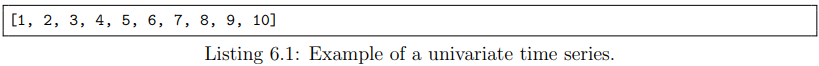


Thuật toán học có giám sát(supervised) yêu cầu dữ liệu được cung cấp dưới dạng tập hợp các mẫu, trong đó mỗi mẫu có thành phần input (X) và thành phần output (y).

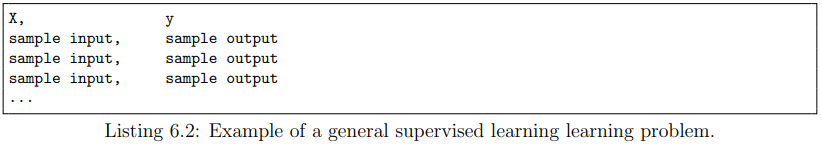

Mô hình sẽ tìm hiểu cách ánh xạ đầu vào thành đầu ra

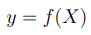

Time series phải được chuyển đổi thành mẫu với các thành input và output. Biến đổi vừa cho biết mô hình sẽ học gì và cách chúng ta dự định sử dụng mô hình trong tương lai khi đưa ra dự đoán, ví dụ: điều gì cần thiết để đưa ra dự đoán (X) và điều gì cần đưa ra dự đoán (y). Đối với bài toán time series một biến trong đó chúng ta quan tâm đến dự đoán một bước, các quan sát ở các bước thời gian trước đó, còn gọi là lag observation (quan sát trễ), được sử dụng làm đầu vào và đầu ra là quan sát ở bước thời gian hiện tại. Ví dụ: chuỗi đơn biến 10 bước ở trên có thể được biểu diễn dưới dạng bài toán học có giám sát với ba bước thời gian cho đầu vào và một bước làm đầu ra, như sau:

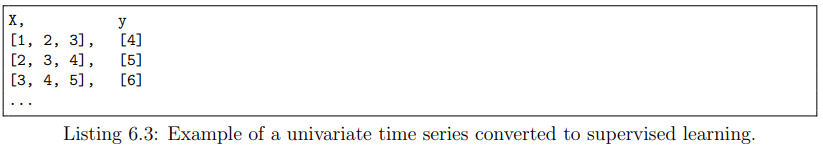

```python
"""
Input: 1,2,3,4,5,6,7,8,9,10

Lag = 3
[1, 2, 3] => 4
[2, 3, 4] => 5
[3, 4, 5] => 6
[4, 5, 6] => 7
[5, 6, 7] => 8
[6, 7, 8] => 9
[7, 8, 9] => 10
"""
```

Bây giờ chúng ta sẽ thực hiện chia một chuỗi đơn biến nhất định thành nhiều mẫu trong đó mỗi mẫu có số bước thời gian được chỉ định và đầu ra là một bước thời gian duy nhất.

In [ ]:
import numpy as np

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


Sau khi chúng ta chuyển đổi dữ liệu của mình thành dạng phù hợp để train mô hình học có giám sát, dữ liệu sẽ được biểu diễn dưới dạng hàng và cột. Mỗi cột sẽ đại diện cho một đặc điểm của mô hình và có thể tương ứng với một quan sát độ trễ riêng biệt. Mỗi hàng sẽ đại diện cho một mẫu và sẽ tương ứng với một ví dụ mới với các thành phần đầu vào và đầu ra.


*   Feature: Một cột trong tập dữ liệu (x1, x2, x3)

*   Sample: Một hàng trong tập dữ liệu, chẳng hạn như chuỗi đầu vào và đầu ra cho tập dữ liệu chuỗi thời gian.



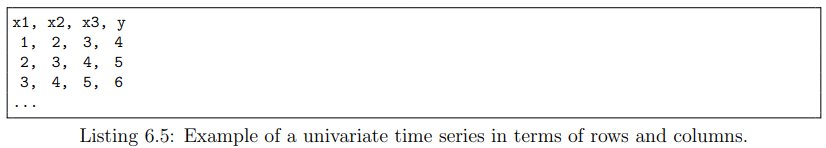

 Ví dụ: Time series có 3 input, 1 output  sẽ được chuyển thành bài toán học có giám sát(supervised) với 4 cột hoặc thực sự là 3 cột cho input data và 1 cột cho output data. Nếu chúng ta có 7 hàng và 3 cột cho input data thì hình dạng của tập dữ liệu sẽ là [7, 3]. Bây giờ chúng ta sẽ thực hiện phép biến đổi series thành data supervised thông thường.

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define univariate time series
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)

# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)

# show each sample
for i in range(len(X)):
    print(X[i], y[i])


(10,)
(7, 3) (7,)
[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


Dữ liệu ở dạng này có thể được sử dụng trực tiếp để huấn luyện deep learning model. Đây là điều mà chúng ta phải hết sức lưu ý khi chúng ta training dữ liệu time series với deep learning model vì chúng yêu cầu dữ liệu phải có cấu trúc 3D thay vì cấu trúctrúc 2D thông thường.

### 6.3 3D Data Preparation Basics


Việc chuẩn bị dữ liệu time series cho deep learning model yêu cầu thêm một bước ngoài việc chuyển dữ liệu thành bài toán học có giám sát. Bước bổ sung này gây ra nhiều nhầm lẫn nhất định cho người mới bắt đầu. Trong phần này, chúng ta sẽ tìm hiểu những kiến thức cơ bản về cách thức và lý do chúng ta cần chuẩn bị dữ liệu 3D cho deep learning model.

Ví dụ về khai báo model LSTM bằng python (tensorflow)

```python
# lstm with an input layer
...
model = Sequential()
model.add(LSTM(32, input_shape=(3, 1)))
model.add(Dense(1))
```



Ví dụ từ phần trước mà chúng ta chia thành 3 bước thời gian input và 1 output. Chúng ta có thể đã tải tập dữ liệu time series của mình từ CSV hoặc chuyển nó thành bài toán học có giám sát trong bộ nhớ. Nó sẽ có hình dạng hai chiều và chúng ta phải chuyển đổi nó thành hình dạng ba chiều (như function trên), 3 bước thời gian cho mỗi mẫu và 1 output cho mỗi bước thời gian [7, 3, 1]. Chúng ta có thể thực hiện việc này bằng cách sử dụng hàm NumPy reshape(). Ví dụ: nếu chúng ta có 7 mẫu và 3 bước thời gian trên mỗi mẫu cho phần tử đầu vào của chuỗi thời gian, chúng ta có thể định hình lại nó thành [7, 3, 1] bằng cách cung cấp một bộ dữ liệu cho hàm reshape() chỉ định hình dạng mới mong muốn của (7, 3, 1).

```python
[1,2,3,4,5,6,7,8,9,10]
```



```python
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((7, 3, 1))
"""
7: số lượng dòng trong dataset (được tạo ra bởi lag observation - quan sát trễ)
3: lag=3 => x1, x2, x3
1: là có 1 cột nhãn (x1, x2, x3 cần dự đoán 1 nhãn y)
"""
```



Một cách tổng quát chúng ta sử dụng như sau:



```python
# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# X (7, 3) => X.shape[0] = 7, X.shape[1] = 3
```



Tổng hợp lại chúng ta sẽ có một ví dụ đầy đủ sau:

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define time series data
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(series.shape)

# transform to a supervised learning problem
X, y = split_sequence(series, 3)
print("pre X: ", X)
print(X.shape, y.shape)

# transform input from [samples, features] to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)
# print("X: ", X)


(10,)
pre X:  [[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
(7, 3) (7,)
(7, 3, 1)


### 6.4 Data Preparation Example


#### 6.4.1 Load the Data


Chúng ta sẽ mô phỏng data bằng cách tạo series với 5.000 dòng.

In [ ]:
from numpy import array

# define the dataset
data = list()
n = 5000

for i in range(n):
    data.append([i + 1, (i + 1) * 10])

data = array(data)
print(data[:5, :])
print(data.shape)


[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
(5000, 2)


#### 6.4.2 Drop the Time Column


Nếu data đồng nhất theo thời gian và không có giá trị nào bị thiếu, chúng ta có thể bỏ cột thời gian. Nếu không, chúng ta có thể muốn xem xét việc áp dụng các giá trị bị thiếu, lấy mẫu lại dữ liệu theo thang thời gian mới hoặc phát triển một mô hình có thể xử lý các giá trị bị thiếu. Ở đây, chúng ta chỉ bỏ cột đầu tiên:

In [ ]:
from numpy import array

# define the dataset
data = list()
n = 5000

for i in range(n):
    data.append([i + 1, (i + 1) * 10])

data = array(data)

# drop time
data = data[:, 1]
print(data.shape)


(5000,)


#### 6.4.3 Split Into Samples


LSTM cần xử lý các mẫu trong đó mỗi mẫu là một chuỗi quan sát duy nhất. Trong trường hợp này, 5.000 bước thời gian là quá dài; LSTM hoạt động tốt hơn với các bước thời gian từ 200 đến 400 (config ổn định). Do đó, chúng ta cần chia 5.000 bước thời gian thành nhiều chuỗi con ngắn hơn. Ví dụ: chúng ta sẽ chia 5.000 bước thời gian thành 25 chuỗi con, mỗi chuỗi 200 bước thời gian.

In [ ]:
from numpy import array

# define the dataset
data = list()
n = 5000

for i in range(n):
    data.append([i + 1, (i + 1) * 10])

data = array(data)

# drop time
data = data[:, 1]

# split into samples (e.g., 5000/200 = 25)
samples = list()
length = 200

# step over the 5,000 in jumps of 200
for i in range(0, n, length):
    # grab from i to i + 200
    sample = data[i:i+length]
    samples.append(sample)

print(len(samples))


25


#### 6.4.4 Reshape Subsequences


LSTM cần dữ liệu có định dạng [sample, timestep, output]. Chúng ta có 25 mẫu, 200 bước thời gian cho mỗi mẫu và 1 output. Đầu tiên, chúng ta cần chuyển đổi danh sách mảng thành mảng NumPy 2D có hình dạng [25, 200].

In [ ]:
from numpy import array

# define the dataset
data = list()
n = 5000

for i in range(n):
    data.append([i + 1, (i + 1) * 10])

data = array(data)

# drop time
data = data[:, 1]

# split into samples (e.g., 5000/200 = 25)
samples = list()
length = 200

# step over the 5,000 in jumps of 200
for i in range(0, n, length):
    # grab from i to i + 200
    sample = data[i:i+length]
    samples.append(sample)

# convert list of arrays into 2d array
data = array(samples)
print(data.shape)


(25, 200)


Tiếp theo, chúng ta có thể sử dụng hàm reshape() để thêm một cột output

In [ ]:
from numpy import array

# define the dataset
data = list()
n = 5000

for i in range(n):
    data.append([i + 1, (i + 1) * 10])

data = array(data)

# drop time
data = data[:, 1]

# split into samples (e.g., 5000/200 = 25)
samples = list()
length = 200

# step over the 5,000 in jumps of 200
for i in range(0, n, length):
    # grab from i to i + 200
    sample = data[i:i+length]
    samples.append(sample)

# convert list of arrays into 2d array
data = array(samples)

# reshape into [samples, timesteps, output]
data = data.reshape((len(samples), length, 1))
print(data.shape)


(25, 200, 1)


# Chapter 7: MLPs for Time Series Forecasting


**Note:** Theo truyền thống, rất nhiều nghiên cứu đã được đầu tư vào việc sử dụng MLP để dự báo chuỗi thời gian với kết quả khiêm tốn. Có lẽ lĩnh vực hứa hẹn nhất trong việc áp dụng các phương pháp học sâu để dự báo chuỗi thời gian là sử dụng CNN, LSTM và các mô hình lai. Do đó, chúng ta sẽ không thấy thêm ví dụ nào về mô hình MLP thẳng để dự báo chuỗi thời gian ngoài hướng dẫn này.

### 7.1 Univariate MLP Models


Multilayer Perceptrons, hay gọi tắt là MLP, có thể được sử dụng để mô hình hóa các vấn đề dự báo time series đơn biến. Time series đơn biến là tập dữ liệu bao gồm một chuỗi quan sát duy nhất có thứ tự thời gian và cần có một mô hình để học từ chuỗi quan sát trong quá khứ để dự đoán giá trị tiếp theo trong chuỗi. Mục này được chia thành hai phần; họ đang:

1. Data Preparation
2. MLP Model


#### 7.1.1 Data Preparation


Trước khi mô hình hóa một chuỗi đơn biến, nó phải được chuẩn bị. Mô hình MLP sẽ học một hàm ánh xạ một chuỗi các quan sát trong quá khứ làm đầu vào cho một quan sát đầu ra. Như vậy, chuỗi quan sát phải được chuyển thành nhiều ví dụ để mô hình có thể học.

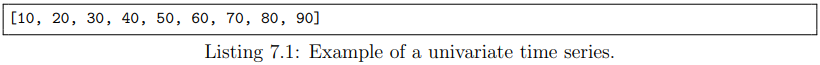

Chúng ta có thể chia chuỗi thành nhiều mẫu input/output được gọi là mẫu, trong đó ba bước thời gian được sử dụng làm đầu vào và một bước thời gian được sử dụng làm đầu ra cho dự đoán một bước đang được học.

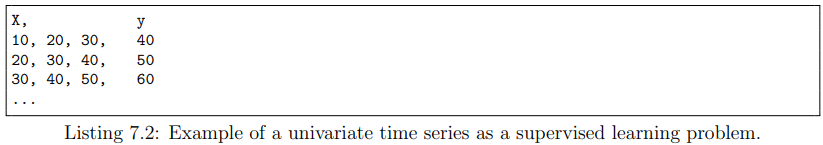

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


#### 7.2.2 MLP Model


Bây giờ chúng ta sẽ định nghĩa MLP như sau:

```python
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```

```python
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(50, activation='relu', input_dim=n_steps))
model.add(Dense(1))
```



```python
# fit model
model.fit(X, y, epochs=2000, verbose=0)
```



Sau khi đã định nghĩa model, chúng ta có thể sử dụng nó để đưa ra dự đoán. Chúng ta có thể dự đoán giá trị tiếp theo trong chuỗi bằng cách cung cấp input: [70, 80, 90]. Và mong đợi mô hình dự đoán điều gì đó như: [100]. Mô hình kỳ vọng input là hai chiều với [mẫu, step], do đó, chúng ta phải định hình lại mẫu input duy nhất trước khi đưa ra dự đoán, ví dụ: với hình dạng [1, 3] cho 1 mẫu và 3 bước thời gian được sử dụng như tính năng đầu vào.



```python
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
```



Bây giờ chúng ta sẽ xây dựng pipeline MLP cơ bản cho dữ liệu time series.

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# define model
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=n_steps))
model.add(Dense(1000, activation='relu', input_dim=n_steps))
model.add(Dense(1000, activation='relu', input_dim=n_steps))
model.add(Dense(500, activation='relu', input_dim=n_steps))
model.add(Dense(250, activation='relu', input_dim=n_steps))
model.add(Dense(1))

# compile
model.compile(optimizer='adam', loss='mse')

# fit model (train model)
model.fit(X, y, epochs=2, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[90.739845]]


### 7.2 Multivariate MLP Models


Time Series đa biến có nghĩa là dữ liệu có nhiều hơn một quan sát cho mỗi bước thời gian. Có hai mô hình chính mà chúng ta có thể yêu cầu với dữ liệu time series đa biến

1. Multiple Input Series.
2. Multiple Parallel Series.

####7.2.1 Multiple Input Series


Một bài toán có thể có hai hoặc nhiều input series song song và một output serie phụ thuộc vào input series. Input series là song song vì mỗi chuỗi có một quan sát ở cùng một bước thời gian. Chúng ta có thể chứng minh điều này bằng một ví dụ đơn giản về hai input series song song trong đó output series là phép cộng đơn giản của input series.



```python
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
```



Chúng ta có thể định hình lại ba mảng dữ liệu này thành một dataset duy nhất trong đó mỗi hàng là một bước thời gian và mỗi cột là một chuỗi thời gian riêng biệt. Đây là cách tiêu chuẩn để lưu trữ chuỗi thời gian song song trong tệp CSV.



```python
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
```



Sau đây là dữ liệu đầy đủ:

In [ ]:
from numpy import array
from numpy import hstack

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


```python
Input: 1 2 3 4 5 6 7 8 9 10
[1, 2, 3] => 4


Input1: 10 20 30 40 50 60 70 80 90
Input2: 15 25 35 45 55 65 75 85 95

Label: 35 45 65 85 .....

3 cột đầu => nhãn lấy tại cột 3 => 65
```

Giống như series một biến, chúng ta phải cấu trúc những dữ liệu này thành các mẫu với các mẫu input và output. Chúng ta cần chia dữ liệu thành các mẫu duy trì thứ tự quan sát trên hai chuỗi input. Nếu chúng ta chọn ba bước thời gian input thì mẫu đầu tiên sẽ trông như sau:

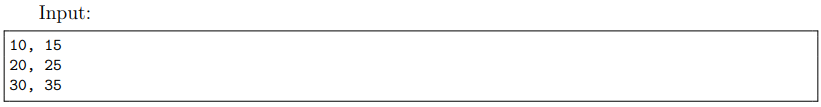

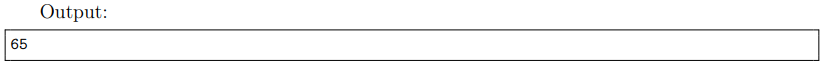

Nghĩa là, ba bước thời gian đầu tiên của mỗi chuỗi song song(parallel series) được cung cấp làm input cho mô hình và mô hình liên kết điều này với giá trị trong chuỗi output ở bước thời gian thứ ba, trong trường hợp này là 65. Chúng ta có thể thấy điều đó, khi chuyển đổi chuỗi thời gian thành các mẫu input/output để huấn luyện mô hình, chúng ta sẽ phải loại bỏ một số giá trị khỏi chuỗi thời gian output mà chúng ta không có giá trị trong chuỗi thời gian input ở các bước thời gian trước đó. Ngược lại, việc lựa chọn kích thước của số bước thời gian đầu vào sẽ có ảnh hưởng quan trọng đến lượng training data được sử dụng.

In [ ]:
from numpy import array, hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


##### MLP Model


Trước khi có thể điều chỉnh MLP trên dữ liệu này, chúng ta phải làm phẳng hình dạng của các mẫu input. MLP yêu cầu hình dạng của phần input của mỗi mẫu là một vector. Với input nhiều biến, chúng ta sẽ có nhiều vector, một vector cho mỗi bước thời gian. Chúng ta có thể làm phẳng cấu trúc thời gian của từng mẫu input, sao cho:

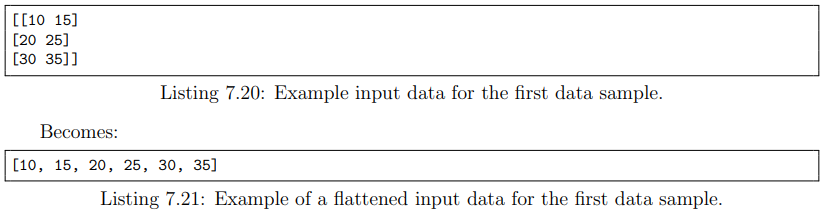

Đầu tiên, chúng ta có thể tính độ dài của mỗi vectơ input bằng số bước thời gian nhân với số đối tượng hoặc chuỗi thời gian. Sau đó chúng ta có thể sử dụng kích thước vector này để định hình lại input.



```python
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
```



Bây giờ chúng ta có thể xác định mô hình MLP cho input nhiều biến trong đó độ dài vectơ được sử dụng cho đối số thứ nguyên input.



```python
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```



Khi đưa ra dự đoán, mô hình mong đợi ba bước thời gian cho hai chuỗi thời gian input. Chúng ta có thể dự đoán giá trị tiếp theo trong chuỗi output chứng minh các giá trị input của: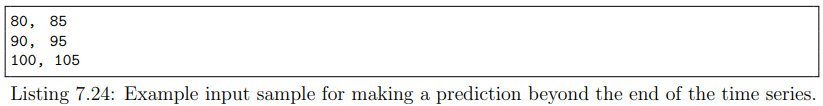

Hình dạng của mẫu 1 với 3 bước thời gian và 2 biến sẽ là [1, 3, 2]. Một lần nữa chúng ta phải định hình lại mẫu này thành 1 mẫu có vectơ gồm 6 phần tử hoặc [1, 6]. Chúng ta mong đợi giá trị tiếp theo trong chuỗi sẽ là 100 + 105 hoặc 205.



```python
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
```



Dưới đây là một setup đầy đủ

In [ ]:
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# define model
# model = Sequential()
# model.add(Dense(100, activation='relu', input_dim=n_input))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

model = Sequential()
model.add(Dense(1000, activation='relu', input_dim=n_input))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1))

# compile model
model.compile(optimizer="adam", loss="mse")

# fit model
model.fit(X, y, epochs=100, verbose=0)

# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[205.55673]]


In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 1000)              7000      
                                                                 
 dense_130 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_131 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_132 (Dense)           (None, 500)               500500    
                                                                 
 dense_133 (Dense)           (None, 250)               125250    
                                                                 
 dense_134 (Dense)           (None, 1)                 251       
                                                                 
Total params: 2635001 (10.05 MB)
Trainable params: 26

##### Multi-headed MLP Model


Có một cách khác phức tạp hơn để mô hình hóa vấn đề. Mỗi chuỗi input có thể được xử lý bởi một MLP riêng biệt và output của từng mô hình con này có thể được kết hợp trước khi đưa ra dự đoán cho chuỗi output. Chúng ta có thể coi đây là multi-headed input MLP model. Nó có thể mang lại sự linh hoạt hơn hoặc hiệu suất tốt hơn tùy thuộc vào chi tiết cụ thể của vấn đề đang được mô hình hóa. Loại mô hình này có thể được xác định trong Keras bằng API chức năng Keras. Đầu tiên, chúng ta có thể định nghĩa mô hình input đầu tiên là MLP với input layer mong đợi các vectơ có n bước tính năng.



```python
# first input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(100, activation='relu')(visible1)
```



Chúng ta có thể định nghĩa mô hình con đầu vào thứ hai theo cách tương tự.



```python
# second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(100, activation='relu')(visible2)
```



Bây giờ cả hai mô hình con input đã được xác định, chúng ta có thể hợp nhất output từ mỗi mô hình thành một vectơ dài, vectơ này có thể được diễn giải trước khi đưa ra dự đoán cho chuỗi output.



```python
# merge input models
merge = concatenate([dense1, dense2])
output = Dense(1)(merge)
```



Sau đó chúng ta có thể liên kết inputs và outputs với nhau.



```python
# connect input and output models
model = Model(inputs=[visible1, visible2], outputs=output)
```



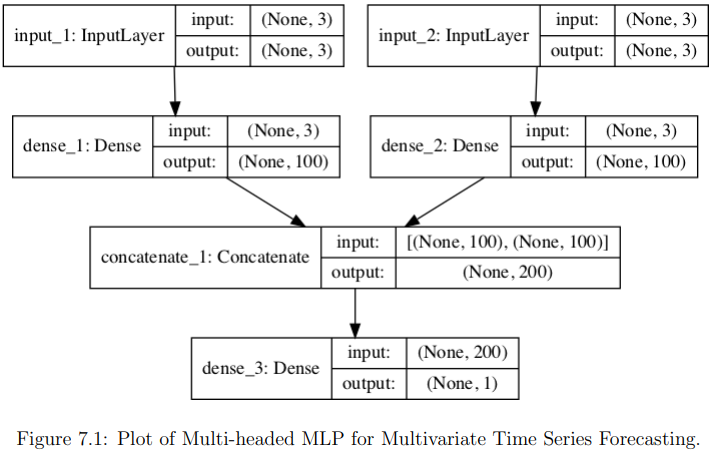

Mô hình này yêu cầu đầu vào phải được cung cấp dưới dạng danh sách gồm hai phần tử, trong đó mỗi phần tử trong danh sách chứa dữ liệu cho một trong các mô hình con. Để đạt được điều này, chúng ta có thể chia dữ liệu đầu vào 3D thành hai mảng dữ liệu đầu vào riêng biệt: đó là từ một mảng có hình [7, 3, 2] thành hai mảng 2D có hình dạng [7, 3].



```python
# separate input data
X1 = X[:, :, 0]
X2 = X[:, :, 1]
```



Sau đây là ví dụ đầy đủ

In [ ]:
from numpy import array, hstack
from keras.models import Model
from keras.layers import Input, Dense, concatenate

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# separate input data
X1 = X[:, :, 0]
X2 = X[:, :, 1]

# first input model
visible1 = Input(shape=(n_steps,))
dense1 = Dense(64, activation='relu')(visible1)
dense1_1 = Dense(64, activation='relu')(dense1)

# second input model
visible2 = Input(shape=(n_steps,))
dense2 = Dense(64, activation='relu')(visible2)
dense2_1 = Dense(64, activation='relu')(dense2)


# merge input models
merge = concatenate([dense1, dense2])
output = Dense(1)(merge)

# create the model
model = Model(inputs=[visible1, visible2], outputs=output)

model.compile(optimizer='adam', loss='mse')

# fit model
model.fit([X1, X2], y, epochs=1000, verbose=0)

# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([x1, x2], verbose=0)
print(yhat)


[[206.52254]]


In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 3)]                  0         []                            
                                                                                                  
 dense_144 (Dense)           (None, 64)                   256       ['input_9[0][0]']             
                                                                                                  
 dense_146 (Dense)           (None, 64)                   256       ['input_10[0][0]']            
                                                                                            

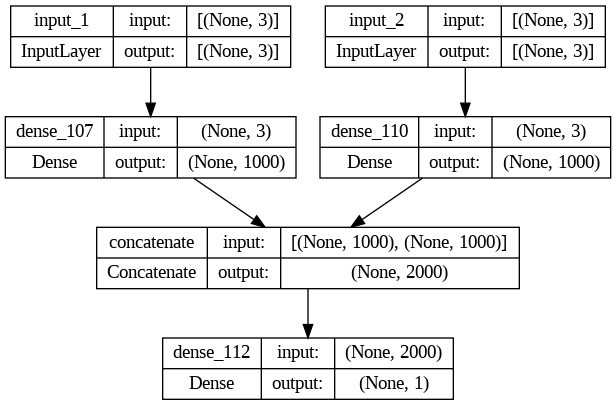

In [ ]:
import keras

keras.utils.plot_model(model, show_shapes=True)

#### 7.2.2 Multiple Parallel Series


Một vấn đề cần đặc biệt quan tâm đó là trường hợp có nhiều chuỗi thời gian song song và phải dự đoán một giá trị cho mỗi chuỗi.


Chúng ta có thể muốn dự đoán giá trị của từng chuỗi thời gian trong số ba chuỗi thời gian cho bước thời gian tiếp theo. Điều này có thể được gọi là dự báo đa biến. Một lần nữa, dữ liệu phải được chia thành các mẫu input/output để huấn luyện mô hình. Mẫu đầu tiên của tập dữ liệu này sẽ là:

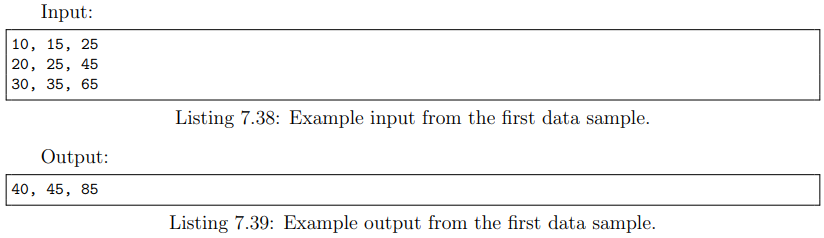

In [ ]:
from numpy import array, hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# print the shape of X and y
print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


```python
"""
T1 T2 T3 T4 T5 => Dự đoán T6 (ngày mai)

3 hướng tiếp cận: 1-1, 1-n, n-n
"""
1 2 3 4 5 6 7 8 9 10 => Cần dự đoán ra 11
Giải theo mối quan hệ n-n với n=3 (Step=3)
1 2 3 => 4 5 6
2 3 4 => 5 6 7
3 4 5 => 6 7 8
ngày_hom_truoc ngay_hom_qua ngay_hom_nay => Ngày mai
T-2 T-1 T => T+1 T+2 T+3
```

##### Vector-Output MLP Model


Bây giờ chúng ta sẽ điều chỉnh mô hình MLP trên dữ liệu này. Giống như trường hợp input nhiều biến, chúng ta phải làm phẳng cấu trúc ba chiều của các mẫu dữ liệu input thành cấu trúc hai chiều của [mẫu, step], trong đó các quan sát trễ được mô hình coi là các step.

```python
# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))
```

Đầu ra của mô hình sẽ là một vectơ, với một phần tử cho mỗi chuỗi trong ba chuỗi thời gian khác nhau

```python
# determine the number of outputs
n_output = y.shape[1]
```

Bây giờ chúng ta có thể xác định mô hình của mình, sử dụng độ dài vectơ phẳng cho lớp input và số chuỗi thời gian làm độ dài vectơ khi đưa ra dự đoán.

```python
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')
```

Chúng ta có thể dự đoán giá trị tiếp theo trong mỗi chuỗi trong số ba chuỗi song song bằng cách cung cấp input gồm ba bước thời gian cho mỗi chuỗi.

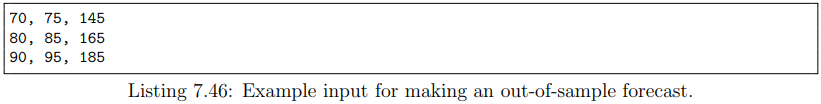

Hình dạng của đầu vào để đưa ra một dự đoán duy nhất phải là 1 mẫu, 3 bước thời gian và 3 đặc điểm hoặc [1, 3, 3]. Một lần nữa, chúng ta có thể làm phẳng điều này thành [1, 6] để đáp ứng mong đợi của mô hình. Chúng ta mong đợi đầu ra vectơ là:

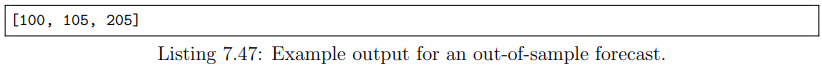

```python
# demonstrate prediction
x_input = array([[70,75,145], [80,85,165], [90,95,185]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
```

Bây giờ chúng ta sẽ có một pipeline hoàn chỉnh

In [ ]:
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# define the number of output variables
n_output = y.shape[1]

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(50, activation='relu', input_dim=n_input))
model.add(Dense(25, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.52212 106.8873  208.38335]]


##### Multi-output MLP Model


Giống như multiple input series, có một cách khác phức tạp hơn để mô hình hóa vấn đề. Mỗi chuỗi input có thể được xử lý bằng một mô hình MLP đầu ra riêng biệt. Chúng ta có thể coi đây là mô hình MLP nhiều đầu ra. Nó có thể mang lại sự linh hoạt hơn hoặc hiệu suất tốt hơn tùy thuộc vào chi tiết cụ thể của vấn đề đang được mô hình hóa.

```python
# define model
visible = Input(shape=(n_input,))
dense = Dense(100, activation='relu')(visible)
```

Sau đó, chúng ta có thể xác định một lớp output cho mỗi chuỗi trong số ba chuỗi mà chúng ta muốn dự báo, trong đó mỗi mô hình con output sẽ dự báo một bước thời gian duy nhất.

```python
# define output 1
output1 = Dense(1)(dense)
# define output 2
output2 = Dense(1)(dense)
# define output 2
output3 = Dense(1)(dense)
```

Sau đó chúng ta có thể liên kết các lớp input và output với nhau thành một mô hình duy nhất.

```python
# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')
```

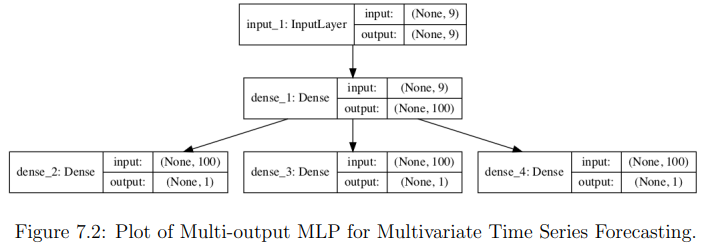

Khi huấn luyện mô hình, nó sẽ yêu cầu ba mảng đầu ra riêng biệt cho mỗi mẫu. Chúng ta có thể đạt được điều này bằng cách chuyển đổi dữ liệu huấn luyện đầu ra có hình dạng [7, 3] thành ba mảng có hình dạng [7, 1].

```python
# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))
```

Bây giờ chúng ta sẽ có một pipeline hoàn chỉnh

In [ ]:
from numpy import array, hstack
from keras.models import Model
from keras.layers import Input, Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))

# define model
visible = Input(shape=(n_input,))
dense = Dense(100, activation='relu')(visible)

# define output layers
output1 = Dense(1)(dense)
output2 = Dense(1)(dense)
output3 = Dense(1)(dense)

# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, [y1, y2, y3], epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[array([[100.33908]], dtype=float32), array([[105.082184]], dtype=float32), array([[205.14339]], dtype=float32)]


### 7.3 Multi-step MLP Models


Trong thực tế, có rất ít sự khác biệt so với mô hình MLP trong việc dự đoán đầu ra vectơ đại diện cho các biến đầu ra khác nhau (như trong ví dụ trước) hoặc vector output đại diện cho nhiều bước thời gian của một biến. Tuy nhiên, có những khác biệt tinh tế và quan trọng trong cách chuẩn bị dữ liệu huấn luyện.

#### 7.3.1 Data Preparation


Giống như dự báo một bước, chuỗi thời gian được sử dụng để dự báo chuỗi thời gian nhiều bước phải được chia thành các mẫu có thành phần input và output. Cả hai thành phần đầu vào và đầu ra sẽ bao gồm nhiều bước thời gian và có thể có hoặc không có cùng số bước.

Ví dụ, với chuỗi thời gian một biến:

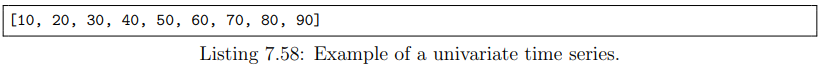

Chúng ta có thể sử dụng ba bước thời gian cuối cùng làm thông tin input và dự báo hai bước thời gian tiếp theo. Mẫu đầu tiên sẽ trông như sau:

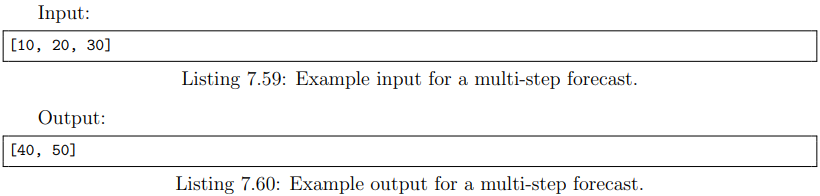

Full code

In [ ]:
# multi-step data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


#### 7.3.2 Vector Output Model


MLP có thể xuất trực tiếp một vectơ có thể được hiểu là dự báo nhiều bước. Cách tiếp cận này đã được thấy trong phần trước, bước thời gian một của mỗi chuỗi thời gian output được dự báo dưới dạng vectơ. Với số bước đầu vào và đầu ra được chỉ định trong n bước vào và n bước ra, chúng ta có thể xác định mô hình dự báo chuỗi thời gian gồm nhiều bước.

Full code


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps_in))
model.add(Dense(n_steps_out))

# compile model
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in))
yhat = model.predict(x_input, verbose=0)

# print predicted output
print(yhat)


[[100.05343 110.58994]]


### 7.4 Multivariate Multi-step MLP Models


##### 7.4.1 Multiple Input Multi-step Output


Có những vấn đề dự báo chuỗi thời gian đa biến trong đó chuỗi đầu ra tách biệt nhưng phụ thuộc vào chuỗi thời gian đầu vào và cần có nhiều bước thời gian cho chuỗi đầu ra.

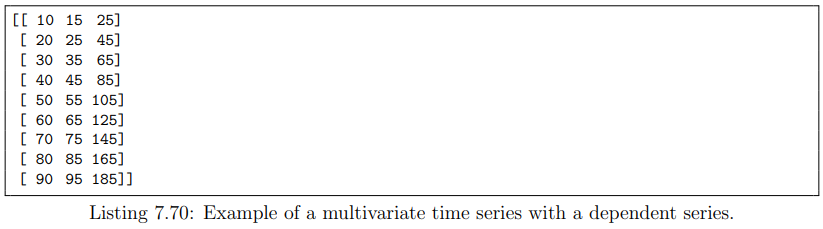


Hàm phân tách chuỗi() bên dưới thực hiện hành vi này.

In [ ]:
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 2) (6, 2)
[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]


Bây giờ chúng ta có thể phát triển mô hình MLP để dự đoán nhiều bước bằng cách sử dụng đầu ra vectơ. Ví dụ đầy đủ được liệt kê dưới đây.

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[185.56252 206.98036]]


#### 7.4.2 Multiple Parallel Input and Multi-step Output


Một bài toán với chuỗi thời gian song song có thể yêu cầu dự đoán nhiều bước thời gian của mỗi chuỗi thời gian.

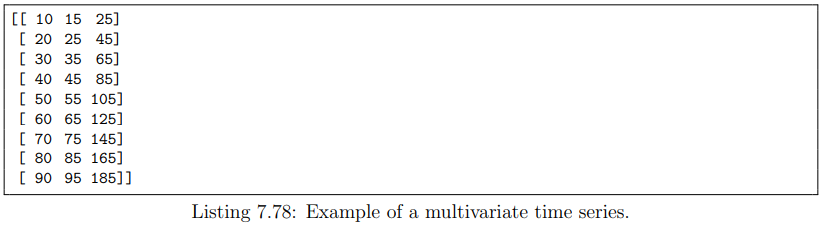

Chúng tôi có thể sử dụng ba bước thời gian cuối cùng của mỗi chuỗi thời gian trong số ba chuỗi thời gian làm đầu vào cho mô hình và dự đoán các bước thời gian tiếp theo của từng chuỗi thời gian trong số ba chuỗi thời gian làm đầu ra. Mẫu đầu tiên trong tập dữ liệu huấn luyện sẽ như sau.

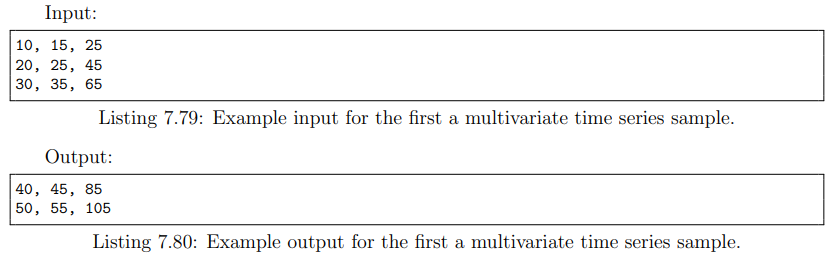

In [ ]:
from numpy import array, hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(5, 3, 3) (5, 2, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]


Bây giờ chúng ta có thể phát triển mô hình MLP để đưa ra dự báo nhiều bước đa biến. Ngoài việc làm phẳng hình dạng của dữ liệu đầu vào, như chúng ta đã làm trong các ví dụ trước, chúng ta cũng phải làm phẳng cấu trúc ba chiều của dữ liệu đầu ra. Điều này là do mô hình MLP chỉ có khả năng lấy vectơ đầu vào và đầu ra.

In [ ]:
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# flatten input
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_input))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_input))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[ 90.99079   97.827415 187.74927  102.07091  107.04477  209.64491 ]]


```python
"""
Tiếp cận theo hướng data:
- n const -> 1 vector
- n vector -> 1 matrix
Tiếp cận theo hướng model:
- 1 model: 1-1, 1-n, n-n, n-1, n-m
- Multi model (multi input): n model con quản lý n series (data)
- Multi model (multi output): n model con quản lý n output
"""
```

## Chapter 8: CNNs for Time Series Forecasting




### 8.1 Overview
Trong phần này, chúng ta sẽ khám phá cách phát triển các mô hình CNN để dự báo time series. Các mô hình được thể hiện trên các bài toán time series nhỏ được tạo ra nhằm mục đích mang lại nhiều giải pháp cho loại bài toán time series đang được giải quyết.

1. Mô hình CNN đơn biến
2. Mô hình CNN đa biến
3. Mô hình CNN nhiều bước
4. Mô hình CNN đa biến nhiều bước


### 8.2 Univariate CNN Models
Mặc dù được phát triển truyền thống cho dữ liệu hình ảnh 2D, CNN có thể được sử dụng để mô hình hóa các vấn đề dự báo time series đơn biến. Time series đơn biến là các tập dữ liệu bao gồm một chuỗi quan sát duy nhất có thứ tự thời gian và cần có một mô hình để học từ chuỗi quan sát trong quá khứ để dự đoán giá trị tiếp theo trong chuỗi. Mục này được chia thành hai phần:

1. Chuẩn bị dữ liệu
2. Mô hình CNN

#### 8.2.1 Data Preparation
Trước khi mô hình hóa một chuỗi đơn biến, nó phải được chuẩn bị. Mô hình CNN sẽ học một hàm ánh xạ một chuỗi các quan sát trong quá khứ làm đầu vào cho một quan sát đầu ra. Như vậy, chuỗi quan sát phải được chuyển thành nhiều ví dụ để mô hình có thể học.

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


Bây giờ chúng ta đã biết cách chuẩn bị một chuỗi đơn biến để lập mô hình, hãy xem việc phát triển mô hình CNN có thể tìm hiểu cách ánh xạ đầu vào thành đầu ra.

#### 8.2.2 CNN Model
1D CNN là mô hình CNN có lớp ẩn tích chập hoạt động trên chuỗi 1D. Tiếp theo là lớp chập thứ hai trong một số trường hợp, chẳng hạn như các chuỗi đầu vào rất dài và sau đó là lớp gộp có nhiệm vụ chắt lọc đầu ra của lớp chập thành các phần tử nổi bật nhất. Các lớp tích chập và tổng hợp được theo sau bởi một lớp dày đặc được kết nối đầy đủ để diễn giải các đặc điểm được trích xuất bởi phần tích chập của mô hình. Một lớp làm phẳng được sử dụng giữa các lớp chập và lớp dày đặc để giảm các bản đồ đặc trưng thành một vectơ một chiều. Chúng ta có thể định nghĩa Mô hình CNN 1D để dự báo chuỗi thời gian đơn biến như sau.

```python
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,
    n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```

Chúng ta cần phải định dạng giá trị đầu vào, đó là những gì mô hình mong đợi làm đầu vào cho mỗi mẫu về số bước thời gian và số lượng feature. Chúng ta đang làm việc với một chuỗi đơn biến, vì vậy số lượng đặc điểm là một, cho một biến.

Hình dạng đầu vào cho mỗi mẫu được chỉ định trong đối số hình dạng đầu vào trong định nghĩa của lớp ẩn đầu tiên. Chúng ta hầu như luôn có nhiều mẫu, do đó, mô hình sẽ mong đợi thành phần đầu vào của dữ liệu huấn luyện có kích thước: [mẫu, step, feature].

```python
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
```

CNN không thực sự xem dữ liệu dưới dạng các bước thời gian, thay vào đó, nó được coi là một chuỗi trong đó các hoạt động đọc tích chập có thể được thực hiện, giống như hình ảnh một chiều. Trong ví dụ này, chúng ta xác định một lớp tích chập với 64 bộ lọc (filter) và với kích thước bộ lọc (size) là 2. TIếp theo đó là lớp pooling và lớp Dense để tổng hợp feature cho MLP.

COde full

In [ ]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
# model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=1000, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[101.125786]]


### 8.3 Multivariate CNN Models

Dữ liệu time series đa biến có nghĩa là dữ liệu có nhiều hơn một quan sát cho mỗi bước thời gian. Có hai mô hình chính mà chúng ta có thể yêu cầu với dữ liệu time series đa biến:

1. Multiple Input Series.
2. Multiple Parallel Series.



####8.3.1 Multiple Input Series
Một bài toán có thể có hai hoặc nhiều chuỗi thời gian đầu vào song song và một chuỗi thời gian đầu ra phụ thuộc vào chuỗi thời gian đầu vào. Chuỗi thời gian đầu vào là song song vì mỗi chuỗi có các quan sát ở các bước thời gian giống nhau. Chúng ta có thể chứng minh điều này bằng một ví dụ đơn giản về hai chuỗi thời gian đầu vào song song trong đó chuỗi đầu ra là phép cộng đơn giản của chuỗi đầu vào.

```python
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
```

Chúng ta có thể định hình lại ba mảng dữ liệu này thành một tập dữ liệu duy nhất trong đó mỗi hàng là một bước thời gian và mỗi cột là một chuỗi thời gian riêng biệt. Đây là cách tiêu chuẩn để lưu trữ chuỗi thời gian song song trong database (csv,...).

```python
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
```

Full code

In [ ]:
from numpy import array
from numpy import hstack

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


Giống như chuỗi thời gian một biến, chúng ta phải cấu trúc những dữ liệu này thành các mẫu với các mẫu đầu vào và đầu ra. 1D CNN model cần có đủ ngữ cảnh để tìm hiểu ánh xạ từ chuỗi đầu vào đến giá trị đầu ra.


Nghĩa là, ba bước thời gian đầu tiên của mỗi chuỗi song song được cung cấp làm đầu vào cho mô hình và mô hình liên kết điều này với giá trị trong chuỗi đầu ra ở bước thời gian thứ ba, trong trường hợp này là 65. Chúng ta có thể thấy điều đó, khi chuyển đổi chuỗi thời gian thành các mẫu đầu vào/đầu ra để huấn luyện mô hình, chúng ta sẽ phải loại bỏ một số giá trị khỏi chuỗi thời gian đầu ra mà chúng ta không có giá trị trong chuỗi thời gian đầu vào ở các bước thời gian trước đó. Ngược lại, việc lựa chọn kích thước của số bước thời gian đầu vào sẽ có ảnh hưởng quan trọng đến lượng dữ liệu huấn luyện được sử dụng.

In [ ]:
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


##### CNN Model


In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=1000, verbose=0)

# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[205.69133]]


In [ ]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 2, 64)             320       
                                                                 
 conv1d_19 (Conv1D)          (None, 2, 64)             4160      
                                                                 
 conv1d_20 (Conv1D)          (None, 2, 64)             4160      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 1, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_127 (Dense)           (None, 50)                3250      
                                                     

##### Multi-headed CNN Model


Có một cách khác phức tạp hơn để mô hình hóa vấn đề. Mỗi chuỗi đầu vào có thể được xử lý bởi một CNN riêng biệt và đầu ra của từng mô hình con này có thể được kết hợp trước khi đưa ra dự đoán cho chuỗi đầu ra. Chúng ta có thể coi đây là mô hình CNN nhiều đầu. Nó có thể mang lại sự linh hoạt hơn hoặc hiệu suất tốt hơn tùy thuộc vào chi tiết cụ thể của vấn đề đang được mô hình hóa. Ví dụ: nó cho phép chúng ta định cấu hình từng mô hình con khác nhau cho từng chuỗi đầu vào, chẳng hạn như số lượng bộ lọc và kích thước của chúng.

```python
# first input model
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)
```

```python
# second input model
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)
```

```python
# merge input models
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)
```

```python
# connect input and output models
model = Model(inputs=[visible1, visible2], outputs=output)
```

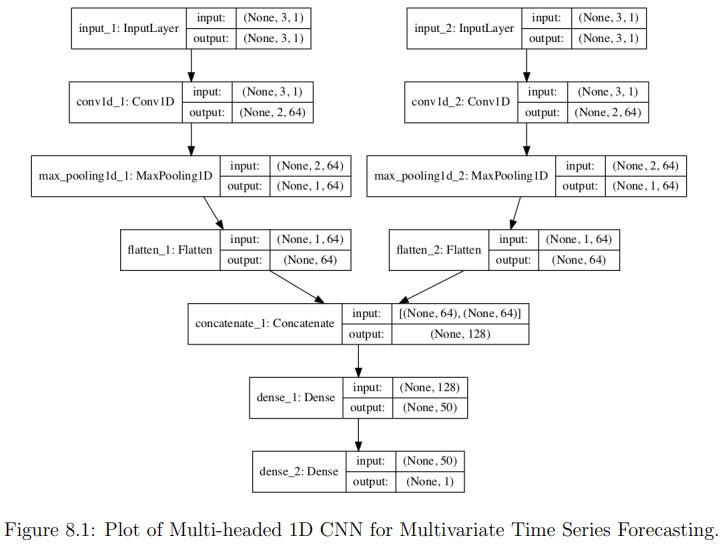

Mô hình này yêu cầu cung cấp đầu vào dưới dạng danh sách gồm hai phần tử trong đó mỗi phần tử trong danh sách chứa dữ liệu cho một trong các mô hình con. Để đạt được điều này, chúng ta có thể chia dữ liệu đầu vào 3D thành hai mảng dữ liệu đầu vào riêng biệt; đó là từ một mảng có hình dạng [7, 3, 2] đến hai mảng 3D có [7, 3, 1]

```python
# one time series per head
n_features = 1
# separate input data
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)
```

Tương tự, chúng ta phải chuẩn bị dữ liệu cho một mẫu dưới dạng hai mảng hai chiều riêng biệt khi thực hiện dự đoán một bước duy nhất

```python
# reshape one sample for making a prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))
```

Full code

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from keras.layers import concatenate

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# one time series per head
n_features = 1

# separate input data
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)

# first input model
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible1)
cnn1 = Conv1D(filters=64, kernel_size=1, activation='relu')(cnn1)
cnn1 = MaxPooling1D(pool_size=2)(cnn1)
cnn1 = Flatten()(cnn1)

# second input model
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(filters=64, kernel_size=2, activation='relu')(visible2)
cnn2 = Conv1D(filters=64, kernel_size=1, activation='relu')(cnn2)
cnn2 = MaxPooling1D(pool_size=2)(cnn2)
cnn2 = Flatten()(cnn2)

# merge input models
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit([X1, X2], y, epochs=1000, verbose=0)

# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))
yhat = model.predict([x1, x2], verbose=0)
print(yhat)

model.summary()


[[205.83235]]
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 3, 1)]               0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 3, 1)]               0         []                            
                                                                                                  
 conv1d_25 (Conv1D)          (None, 2, 64)                192       ['input_11[0][0]']            
                                                                                                  
 conv1d_27 (Conv1D)          (None, 2, 64)                192       ['input_12[0][0]']            
                                                                              

#### 8.3.2 Multiple Parallel Series
Vấn đề về chuỗi thời gian thay thế là trường hợp có nhiều chuỗi thời gian song song và phải dự đoán một giá trị cho mỗi chuỗi.

Chúng ta có thể muốn dự đoán giá trị của từng chuỗi thời gian trong số ba chuỗi thời gian cho bước thời gian tiếp theo. Điều này có thể được gọi là dự báo đa biến. Một lần nữa, dữ liệu phải được chia thành các mẫu đầu vào/đầu ra để huấn luyện mô hình.

In [ ]:
from numpy import array, hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


##### Vector-Output CNN Model


In [ ]:
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# the dataset knows the number of features, e.g., 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_features))  # This layer should have the same number of units as the number of output features
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=3000, verbose=0)

# demonstrate prediction
x_input = array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[100.306305 105.3638   205.34071 ]]


##### Multi-output CNN Model
Giống như chuỗi nhiều đầu vào, có một cách khác phức tạp hơn để mô hình hóa vấn đề. Mỗi chuỗi đầu ra có thể được xử lý bằng một mô hình CNN đầu ra riêng biệt. Chúng ta có thể coi đây là mô hình CNN đa đầu ra. Nó có thể mang lại sự linh hoạt hơn hoặc hiệu suất tốt hơn tùy thuộc vào chi tiết cụ thể của vấn đề đang được mô hình hóa.

```python
# define model
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(visible)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

```

```python
# define output 1
output1 = Dense(1)(cnn)
# define output 2
output2 = Dense(1)(cnn)
# define output 3
output3 = Dense(1)(cnn)
```

```python
# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')
```

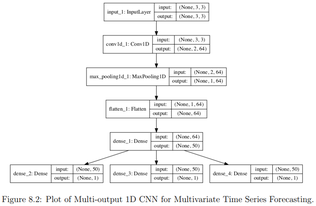

Khi huấn luyện mô hình, nó sẽ yêu cầu ba mảng đầu ra riêng biệt cho mỗi mẫu. Chúng ta có thể đạt được điều này bằng cách chuyển đổi dữ liệu huấn luyện đầu ra có hình dạng [7, 3] thành ba mảng có hình dạng [7, 1].

```python
# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))
```

Full code

In [ ]:
from numpy import array, hstack
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv1D, MaxPooling1D

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
X, y = split_sequences(dataset, n_steps)

# the dataset knows the number of features, e.g., 2
n_features = X.shape[2]

# separate output
y1 = y[:, 0].reshape((y.shape[0], 1))
y2 = y[:, 1].reshape((y.shape[0], 1))
y3 = y[:, 2].reshape((y.shape[0], 1))

# define model
visible = Input(shape=(n_steps, n_features))
cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(visible)
cnn = MaxPooling1D(pool_size=2)(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# define output 1
output1 = Dense(1)(cnn)
# define output 2
output2 = Dense(1)(cnn)
# define output 3
output3 = Dense(1)(cnn)

# tie together
model = Model(inputs=visible, outputs=[output1, output2, output3])
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, [y1, y2, y3], epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[array([[100.22249]], dtype=float32), array([[105.038475]], dtype=float32), array([[205.3323]], dtype=float32)]


### 8.4 Multi-step CNN Models
Trong thực tế, có rất ít sự khác biệt so với mô hình CNN 1D trong việc dự đoán đầu ra vectơ đại diện cho các biến đầu ra khác nhau hoặc đầu ra vector đại diện cho nhiều bước thời gian của một biến. Tuy nhiên, có những khác biệt tinh tế và quan trọng trong cách chuẩn bị dữ liệu huấn luyện.

#### 8.4.1 Data Preparation


Giống như dự báo một bước, chuỗi thời gian được sử dụng để dự báo chuỗi thời gian nhiều bước phải được chia thành các mẫu có thành phần đầu vào và đầu ra. Cả hai thành phần đầu vào và đầu ra sẽ bao gồm nhiều bước thời gian và có thể có hoặc không có cùng số bước. Ví dụ, với chuỗi thời gian một biến:

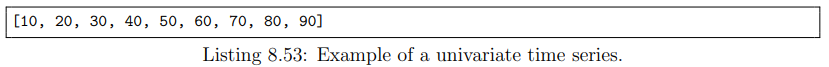

Chúng ta có thể sử dụng ba bước thời gian cuối cùng làm thông tin đầu vào và dự báo hai bước thời gian tiếp theo. Mẫu đầu tiên sẽ trông như sau:


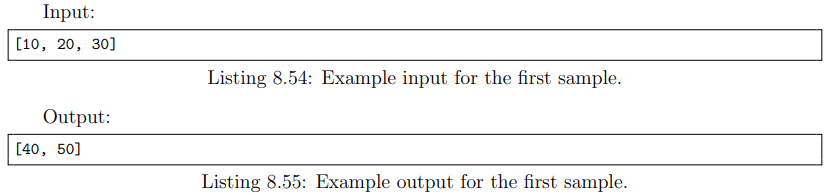

Ví dụ đầy đủ được liệt kê dưới đây.

In [ ]:
# multi-step data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


#### 8.4.2 Vector Output Model


CNN 1D có thể xuất trực tiếp một vectơ có thể được hiểu là dự báo nhiều bước. Cách tiếp cận này đã được thấy trong phần trước, bước thời gian một của mỗi chuỗi thời gian đầu ra được dự báo dưới dạng vectơ. Giống như các mô hình CNN 1D cho dữ liệu đơn biến trong phần trước, các mẫu đã chuẩn bị trước tiên phải được định hình lại. CNN cần dữ liệu có cấu trúc ba chiều gồm [mẫu, step, feature] và trong trường hợp này, chúng tôi chỉ có một feature nên việc định hình lại rất đơn giản.

```python
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
```

Với số bước đầu vào và đầu ra được chỉ định trong n bước vào và n bước ra, chúng ta có thể xác định mô hình dự báo chuỗi thời gian gồm nhiều bước.

```python
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in,
    n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
```

Mô hình có thể đưa ra dự đoán cho một mẫu duy nhất. Chúng ta có thể dự đoán hai bước tiếp theo sau phần cuối của tập dữ liệu bằng cách cung cấp thông tin đầu vào: [70, 80, 90]. Chúng ta mong đợi dự đoán là: [100, 110]. Hình dạng của một mẫu dữ liệu đầu vào khi đưa ra dự đoán phải là [1, 3, 1] cho 1 mẫu, 3 bước thời gian của đầu vào và feature đơn lẻ.

```python
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
```

Full code

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[103.45503  116.151794]]


### 8.5 Multivariate Multi-step CNN Models


#### 8.5.1 Multiple Input Multi-step Output


Có những vấn đề dự báo chuỗi thời gian đa biến trong đó chuỗi đầu ra tách biệt nhưng phụ thuộc vào chuỗi thời gian đầu vào và cần có nhiều bước thời gian cho chuỗi đầu ra.


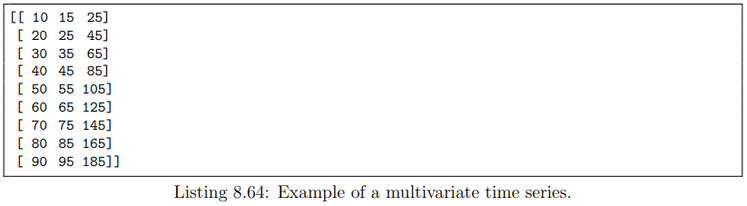

Chúng ta có thể sử dụng ba bước thời gian trước của mỗi chuỗi thời gian đầu vào để dự đoán hai bước thời gian của chuỗi thời gian đầu ra.


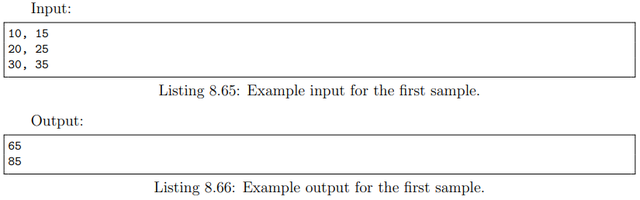

In [ ]:
# multivariate multi-step data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 2) (6, 2)
[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]


Bây giờ chúng ta có thể phát triển mô hình CNN 1D để dự đoán nhiều bước.

In [ ]:
# multivariate multi-step 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# the dataset knows the number of features, e.g., 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=2000, verbose=0)

# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[185.98866 207.16248]]


#### 8.5.2 Multiple Parallel Input and Multi-step Output


Một bài toán với chuỗi thời gian song song có thể yêu cầu dự đoán nhiều bước thời gian của mỗi chuỗi thời gian.

Chúng ta có thể sử dụng ba bước thời gian cuối cùng của mỗi chuỗi thời gian trong số ba chuỗi thời gian làm đầu vào cho mô hình và dự đoán các bước thời gian tiếp theo của từng chuỗi thời gian trong số ba chuỗi thời gian làm đầu ra. Mẫu đầu tiên trong tập dữ liệu huấn luyện sẽ như sau.

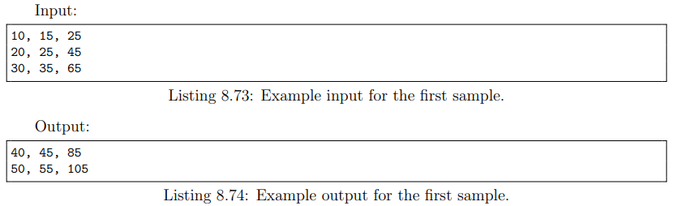

Setup dữ liệu

In [ ]:
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(5, 3, 3) (5, 2, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]


Bây giờ chúng ta có thể phát triển mô hình CNN 1D cho tập dữ liệu này. Chúng ta sẽ sử dụng mô hình đầu ra vector trong trường hợp này. Như vậy, chúng ta phải làm phẳng cấu trúc ba chiều của phần đầu ra của từng mẫu để huấn luyện mô hình. Điều này có nghĩa là, thay vì dự đoán hai bước cho mỗi chuỗi, mô hình được huấn luyện và dự kiến ​​sẽ dự đoán trực tiếp một vectơ gồm sáu số.

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

# the dataset knows the number of features, e.g., 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=7000, verbose=0)

# demonstrate prediction
x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[ 90.385284  95.8954   185.77061  100.965485 106.34643  206.27364 ]]


## Chapter 9: LSTMs for Time Series Forecasting

LSTM có thể được áp dụng để dự báo time series. Có nhiều loại mô hình LSTM có thể được sử dụng cho từng loại vấn đề dự báo time series cụ thể. Trong phần này chúng ta sẽ khám phá cách phát triển một bộ mô hình LSTM cho một loạt các vấn đề dự báo chuỗi thời gian tiêu chuẩn. Mục tiêu của hướng dẫn này là cung cấp các ví dụ độc lập của từng mô hình về từng loại vấn đề về chuỗi thời gian dưới dạng mẫu mà bạn có thể sao chép và điều chỉnh cho phù hợp với vấn đề dự báo chuỗi thời gian cụ thể của mình.

*   Cách phát triển mô hình LSTM để dự báo chuỗi thời gian đơn biến.


*   Cách phát triển mô hình LSTM để dự báo chuỗi thời gian đa biến.


*   Cách phát triển mô hình LSTM để dự báo chuỗi thời gian nhiều bước.




### 9.1 Tutorial Overview
chúng ta sẽ phát triển một bộ các loại mô hình LSTM khác nhau để dự báo time series. Các mô hình được thể hiện trên các bài toán time series nhỏ được tạo ra nhằm mục đích mang lại giải pháp cho loại bài toán time series đang được giải quyết:
1. Mô hình LSTM đơn biến
2. Mô hình LSTM đa biến
3. Mô hình LSTM nhiều bước
4. Mô hình LSTM nhiều bước đa biến

### 9.2 Univariate LSTM Models
LSTM có thể được sử dụng để mô hình hóa các vấn đề dự báo time series đơn biến. Đây là những vấn đề bao gồm một chuỗi quan sát duy nhất và cần có một mô hình để học hỏi từ chuỗi quan sát đó.

1. Chuẩn bị dữ liệu
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN-LSTM
6. ConvLSTM

Mỗi mô hình này được thể hiện để dự báo chuỗi thời gian một bước, nhưng có thể dễ dàng điều chỉnh và sử dụng làm phần đầu vào của mô hình cho các loại vấn đề dự báo chuỗi thời gian khác.

#### 9.2.1 Data Preparation
Trước khi mô hình hóa một chuỗi đơn biến, nó phải được chuẩn bị. Mô hình LSTM sẽ học một hàm ánh xạ một chuỗi các quan sát trong quá khứ làm đầu vào cho một quan sát đầu ra. Như vậy, chuỗi quan sát phải được chuyển đổi thành nhiều ví dụ để LSTM có thể học hỏi.

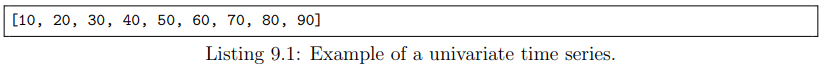

Chúng ta có thể chia chuỗi thành nhiều mẫu đầu vào/đầu ra được gọi là mẫu, trong đó ba bước thời gian được sử dụng làm đầu vào và một bước thời gian được sử dụng làm đầu ra cho dự đoán một bước đang được học.

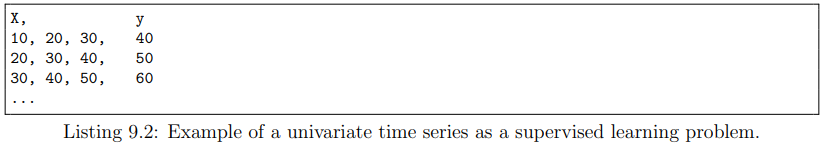

Hàm phân tách chuỗi() bên dưới thực hiện hành vi này và sẽ chia một chuỗi đơn biến nhất định thành nhiều mẫu trong đó mỗi mẫu có số bước thời gian được chỉ định và đầu ra là một bước thời gian duy nhất.

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps

        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


#### 9.2.2 Vanilla LSTM
Vanilla LSTM là một mô hình LSTM có một lớp đơn vị LSTM ẩn duy nhất và một lớp đầu ra được sử dụng để đưa ra dự đoán. Điểm mấu chốt của LSTM là chúng cung cấp sự hỗ trợ riêng cho các chuỗi. Không giống như CNN đọc trên toàn bộ vectơ đầu vào, mô hình LSTM đọc từng bước một của chuỗi tại một thời điểm và xây dựng biểu diễn trạng thái bên trong có thể được sử dụng làm bối cảnh đã học để đưa ra dự đoán. Chúng ta có thể định nghĩa Vanilla LSTM để dự báo chuỗi thời gian một biến như sau.

```python
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```

Các đơn vị LSTM và lớp đầu ra được sử dụng để đưa ra dự đoán. Điểm mấu chốt của LSTM là chúng cung cấp sự hỗ trợ riêng cho các chuỗi. Không giống như CNN đọc trên toàn bộ vectơ đầu vào, mô hình LSTM đọc từng bước một của chuỗi tại một thời điểm và xây dựng biểu diễn trạng thái bên trong có thể được sử dụng làm bối cảnh đã học để đưa ra dự đoán. Chúng ta có thể định nghĩa Vanilla LSTM để dự báo chuỗi thời gian một biến như sau.

```python
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
```

Full code

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps

        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

model.summary()

[[102.69088]]
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10400     
                                                                 
 dense_154 (Dense)           (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 9.2.3 Stacked LSTM
Nhiều lớp LSTM ẩn có thể được xếp chồng lên nhau. Lớp LSTM yêu cầu đầu vào ba chiều và LSTM theo mặc định sẽ tạo ra đầu ra hai chiều dưới dạng diễn giải từ cuối chuỗi. Chúng ta có thể giải quyết vấn đề này bằng cách cho LSTM xuất ra một giá trị cho mỗi bước thời gian trong dữ liệu đầu vào bằng cách đặt đối số return_squence=True trên lớp. Điều này cho phép chúng ta lấy đầu ra 3D từ lớp LSTM ẩn làm đầu vào cho lớp tiếp theo. Do đó, chúng ta có thể định nghĩa LSTM xếp chồng như sau.

```python
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps

        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

model.summary()

[[103.52199]]
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_6 (LSTM)               (None, 3, 50)             20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_152 (Dense)           (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 9.2.4 Bidirectional LSTM

Đối với một số vấn đề về dự đoán trình tự, có thể có ích khi cho phép mô hình LSTM tìm hiểu trình tự đầu vào cả tiến và lùi và nối cả hai cách diễn giải. Đây được gọi là LSTM hai chiều. Chúng ta có thể triển khai LSTM hai chiều để dự báo chuỗi thời gian đơn biến bằng cách gói lớp ẩn đầu tiên trong lớp bao bọc có tên là Hai chiều.

```python
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps

        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break

        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

model.summary()

[[101.677666]]
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 100)               20800     
 al)                                                             
                                                                 
 dense_153 (Dense)           (None, 1)                 101       
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 9.2.5 CNN-LSTM

 CNN có thể rất hiệu quả trong việc tự động trích xuất và học các tính năng từ dữ liệu chuỗi một chiều như dữ liệu chuỗi thời gian đơn biến. Mô hình CNN có thể được sử dụng trong mô hình kết hợp với phần phụ trợ LSTM trong đó CNN được sử dụng để diễn giải các chuỗi đầu vào tiếp theo được cung cấp dưới dạng trình tự cho mô hình LSTM để diễn giải. Mô hình lai này được gọi là CNN-LSTM.

Bước đầu tiên là chia các chuỗi đầu vào thành các chuỗi con có thể được mô hình CNN xử lý. Ví dụ: trước tiên chúng ta có thể chia dữ liệu chuỗi thời gian đơn biến thành các mẫu đầu vào/đầu ra với bốn bước làm đầu vào và một bước làm đầu ra. Sau đó, mỗi mẫu có thể được chia thành hai mẫu con, mỗi mẫu có hai time steps. CNN có thể diễn giải từng chuỗi con của hai bước thời gian và cung cấp chuỗi thời gian diễn giải các chuỗi con cho mô hình LSTM để xử lý làm đầu vào. Chúng ta có thể tham số hóa điều này và xác định số lượng chuỗi con là time steps per subsequence as n steps. Sau đó, dữ liệu đầu vào có thể được định hình lại để có cấu trúc: [mẫu, n_sequence, step, feature].
Ví dụ:

```python
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
```

Sử dụng lại cùng một mô hình CNN khi đọc riêng từng chuỗi dữ liệu phụ. Điều này có thể đạt được bằng cách gói toàn bộ mô hình CNN trong một trình bao bọc TimeDistributed sẽ áp dụng toàn bộ mô hình một lần cho mỗi đầu vào, trong trường hợp này là một lần cho mỗi chuỗi con đầu vào. Mô hình CNN trước tiên có một lớp convolution để đọc qua chuỗi con yêu cầu một số bộ lọc và kích thước hạt nhân được chỉ định. Số lượng bộ lọc là số lần đọc hoặc diễn giải của chuỗi đầu vào. Kích thước kernel là số bước thời gian được bao gồm trong mỗi thao tác đọc của chuỗi đầu vào. Lớp convolution được theo sau bởi lớp tổng hợp tối đa giúp chắt lọc các bản đồ bộ lọc xuống còn 1/4 kích thước của chúng bao gồm các tính năng nổi bật nhất. Các cấu trúc này sau đó được làm phẳng thành một vector một chiều duy nhất để sử dụng làm bước thời gian đầu vào duy nhất cho lớp LSTM.

Sử dụng lại cùng một mô hình CNN khi đọc riêng từng chuỗi dữ liệu phụ. Điều này có thể đạt được bằng cách gói toàn bộ mô hình CNN trong một trình bao bọc TimeDistributed sẽ áp dụng toàn bộ mô hình một lần cho mỗi đầu vào, trong trường hợp này là một lần cho mỗi chuỗi con đầu vào. Mô hình CNN trước tiên có một lớp convolution để đọc qua chuỗi con yêu cầu một số bộ lọc và kích thước hạt nhân được chỉ định. Số lượng bộ lọc là số lần đọc hoặc diễn giải của chuỗi đầu vào. Kích thước kernel là số bước thời gian được bao gồm trong mỗi thao tác đọc của chuỗi đầu vào. Lớp convolution được theo sau bởi lớp tổng hợp tối đa giúp chắt lọc các bản đồ bộ lọc xuống còn 1/4 kích thước của chúng bao gồm các tính năng nổi bật nhất. Các cấu trúc này sau đó được làm phẳng thành một vectơ một chiều duy nhất để sử dụng làm bước thời gian đầu vào duy nhất cho lớp LSTM.

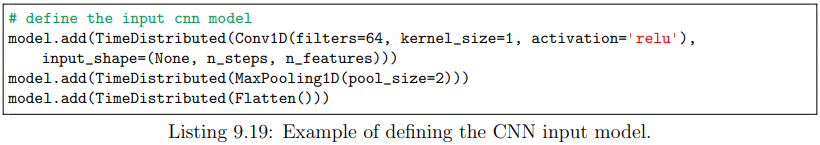



```python
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
```

Full code

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose a number of time steps
n_steps = 4

# Split into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

# Define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=500, verbose=0)

# Demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

model.summary()


[[100.507385]]
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 2, 64)       128       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 1, 64)       0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 64)          0         
 stributed)                                                      
                                                                 
 lstm_10 (LSTM)              (None, 50)                23000     
                                                                 
 dense_155 (Dense)           (None, 1)                 51        
                                      

#### 9.2.6 ConvLSTM

Một loại LSTM liên quan đến CNN-LSTM là ConvLSTM, trong đó việc đọc đầu vào tích chập được tích hợp trực tiếp vào từng đơn vị LSTM. ConvLSTM được phát triển để đọc dữ liệu không gian-thời gian hai chiều, nhưng có thể được điều chỉnh để sử dụng với dự báo chuỗi thời gian đơn biến. Lớp mong đợi đầu vào là một chuỗi các hình ảnh hai chiều, do đó hình dạng của dữ liệu đầu vào phải là: [mẫu, step, hàng, cột, features].

Mục đích có thể chia từng mẫu thành các chuỗi con trong đó dấu thời gian sẽ trở thành số lượng chuỗi con hoặc n seq và các cột sẽ là số bước thời gian cho mỗi chuỗi con hoặc n bước. Số lượng hàng được cố định là 1 vì chúng tôi đang làm việc với dữ liệu một chiều. Bây giờ chúng ta có thể định hình lại các mẫu đã chuẩn bị theo cấu trúc yêu cầu.

```python
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, row, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
```

Định nghĩa ConvLSTM là một lớp duy nhất nhận xét về số lượng filters và kích thước kernel hai chiều bình luận về (hàng, cột). Vì chúng ta đang làm việc với chuỗi một chiều nên số hàng luôn được xác định là 1 trong kernel. Sau đó, đầu ra của mô hình phải được thực hiện trước khi có thể diễn giải và đưa ra kết quả mong đợi.

```python
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
```

Full code

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose a number of time steps
n_steps = 4

# Split into samples
X, y = split_sequence(raw_seq, n_steps)

# Reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

# Define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=500, verbose=0)

# Demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

model.summary()


[[104.26237]]
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 1, 64)          33536     
                                                                 
 flatten_14 (Flatten)        (None, 64)                0         
                                                                 
 dense_156 (Dense)           (None, 1)                 65        
                                                                 
Total params: 33601 (131.25 KB)
Trainable params: 33601 (131.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9.3 Multivariate LSTM Models




#### 9.3.1 Multiple Input Series

Một bài toán có thể có hai hoặc nhiều chuỗi input time series song song và một chuỗi thời gian đầu ra phụ thuộc vào chuỗi thời gian đầu vào. Chuỗi thời gian đầu vào là song song vì mỗi chuỗi có một quan sát ở các bước thời gian giống nhau. Chúng ta có thể chứng minh điều này bằng một ví dụ đơn giản về hai chuỗi thời gian đầu vào song song trong đó chuỗi đầu ra là phép cộng đơn giản của chuỗi đầu vào.

```python
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
```

Full code

In [ ]:
from numpy import hstack

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]


Giống như chuỗi thời gian một biến, chúng ta phải cấu trúc những dữ liệu này thành các mẫu với các phần tử đầu vào và đầu ra. Mô hình LSTM cần có đủ ngữ cảnh để tìm hiểu ánh xạ từ chuỗi đầu vào đến giá trị đầu ra. LSTM có thể hỗ trợ chuỗi thời gian đầu vào song song dưới dạng các biến hoặc tính năng riêng biệt. Do đó, chúng ta cần chia dữ liệu thành các mẫu duy trì thứ tự quan sát trên hai chuỗi đầu vào. Nếu chúng ta chọn ba bước thời gian đầu vào thì mẫu đầu tiên sẽ trông như sau:

```python
"""
Input:
10, 15
20, 25
30, 35
Output:
65
"""
```

Nghĩa là, ba bước thời gian đầu tiên của mỗi chuỗi song song được cung cấp làm đầu vào cho mô hình và mô hình liên kết điều này với giá trị trong chuỗi đầu ra ở bước thời gian thứ ba, trong trường hợp này là 65. Chúng ta có thể thấy điều đó, khi chuyển đổi chuỗi thời gian thành các mẫu đầu vào/đầu ra để huấn luyện mô hình, chúng ta sẽ phải loại bỏ một số giá trị khỏi chuỗi thời gian đầu ra mà chúng ta không có giá trị trong chuỗi thời gian đầu vào ở các bước thời gian trước đó. Ngược lại, việc lựa chọn kích thước của số bước thời gian đầu vào sẽ có ảnh hưởng quan trọng đến lượng dữ liệu huấn luyện được sử dụng

In [ ]:
from numpy import array
from numpy import hstack

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = hstack((in_seq1, in_seq2, out_seq))

# Choose a number of time steps
n_steps = 3

# Convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


Sẵn sàng để điều chỉnh mô hình LSTM trên dữ liệu này. Chúng ta có thể sử dụng bất kỳ loại LSTM nào trong phần trước, chẳng hạn như mô hình Vanilla, Stacked, Bidirectional, CNN hoặc ConvLSTM. Sử dụng Vanilla LSTM trong đó số bước thời gian và chuỗi (tính năng) song song được chỉ định cho lớp đầu vào thông qua đối số hình dạng đầu vào.



In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Hình dạng của một mẫu có ba bước thời gian và hai biến phải là [1, 3, 2]. Chúng ta mong đợi giá trị tiếp theo trong chuỗi sẽ là 100 + 105 hoặc 205.

In [ ]:
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

Ví dụ đầy đủ được liệt kê dưới đây.

In [ ]:
# Multivariate LSTM Example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = hstack((in_seq1, in_seq2, out_seq))

# Choose a number of time steps
n_steps = 3

# Convert into input/output
X, y = split_sequences(dataset, n_steps)

# The dataset knows the number of features
n_features = X.shape[2]

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[205.84303]]


#### 9.3.2 Multiple Parallel Series
Vấn đề về chuỗi thời gian thay thế là trường hợp có nhiều chuỗi thời gian song song và phải dự đoán một giá trị cho mỗi chuỗi.

```python
[
  [10 15 25]
  [20 25 45]
  [30 35 65]
  [40 45 85]
  [50 55 105]
  [60 65 125]
  [70 75 145]
  [80 85 165]
  [90 95 185]
]
```

Muốn dự đoán giá trị của từng chuỗi thời gian trong số ba chuỗi thời gian cho bước thời gian tiếp theo. Điều này có thể được gọi là dự báo đa biến. Một lần nữa, dữ liệu phải được chia thành các mẫu đầu vào/đầu ra để huấn luyện mô hình.

In [ ]:
from numpy import array
from numpy import hstack

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = hstack((in_seq1, in_seq2, out_seq))

# Choose a number of time steps
n_steps = 3

# Convert into input/output
X, y = split_sequences(dataset, n_steps)

# Print the shape of X and y
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 3) (6, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]


Chạy ví dụ trước tiên sẽ in hình dạng của các thành phần X và y đã chuẩn bị. Hình dạng của X là ba chiều, bao gồm số lượng mẫu (6), số bước thời gian được chọn cho mỗi mẫu (3) và số chuỗi thời gian hoặc đặc điểm song song (3). Hình dạng của y là hai chiều như chúng ta có thể mong đợi đối với số lượng mẫu (6) và số lượng biến thời gian trên mỗi mẫu được dự đoán (3). Dữ liệu đã sẵn sàng để sử dụng trong mô hình LSTM dự kiến hình dạng đầu vào ba chiều và đầu ra hai chiều cho các thành phần X và y của mỗi mẫu. Sau đó, mỗi mẫu được in hiển thị các thành phần đầu vào và đầu ra của từng mẫu.

Điều chỉnh mô hình LSTM

```python
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps,
n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
```

Full code

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequences
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns to create the dataset
dataset = hstack((in_seq1, in_seq2, out_seq))

# Choose a number of time steps
n_steps = 3

# Convert into input/output
X, y = split_sequences(dataset, n_steps)

# The dataset knows the number of features
n_features = X.shape[2]

# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=400, verbose=0)

# Demonstrate prediction
x_input = array([[70, 75, 145], [80, 85, 165], [90, 95, 185]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[100.16786  105.461426 205.59296 ]]


### 9.4 Multi-step LSTM Models



#### 9.4.1 Data Preparation
Giống như dự báo một bước, chuỗi thời gian được sử dụng để dự báo chuỗi thời gian nhiều bước phải được chia thành các mẫu có thành phần đầu vào và đầu ra. Cả hai thành phần đầu vào và đầu ra sẽ bao gồm nhiều time steps và có thể có hoặc không có cùng số bước.

Ví dụ, với chuỗi thời gian một biến:

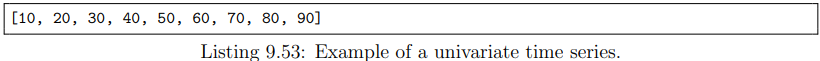

Chúng ta có thể sử dụng ba bước thời gian cuối cùng làm thông tin đầu vào và dự báo hai bước thời gian tiếp theo. Mẫu đầu tiên sẽ trông như sau:

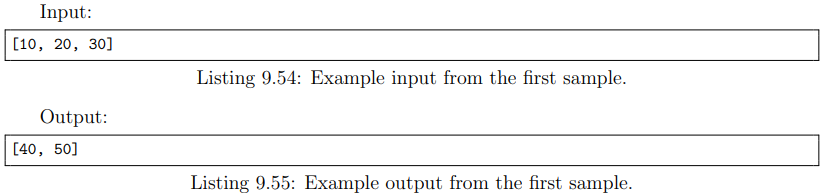


Hàm phân tách chuỗi() bên dưới thực hiện hành vi này và sẽ chia chuỗi thời gian đơn biến nhất định thành các mẫu với số bước thời gian đầu vào và đầu ra được chỉ định.

In [ ]:
from numpy import array

# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])


[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


#### 9.4.2 Vector Output Model

Giống như các mô hình mạng nơ-ron khác, LSTM có thể trực tiếp xuất ra một vector có thể được hiểu là dự đoán cho multi-step forecast. Phương pháp này đã được thấy trong phần trước, nơi một bước thời gian của mỗi chuỗi thời gian đầu ra đã được dự đoán dưới dạng một vector. Như với LSTM cho dữ liệu một biến trong phần trước, các mẫu đã được chuẩn bị phải được định hình trước tiên. LSTM mong đợi dữ liệu có cấu trúc ba chiều [mẫu, step, feature].

Với số lượng bước thời gian đầu vào và đầu ra được chỉ định trong các biến n_steps_in và n_steps_out, chúng ta có thể định nghĩa một mô hình dự đoán chuỗi thời gian cho nhiều bước. Bất kỳ loại mô hình LSTM nào đã được trình bày cũng có thể được sử dụng, chẳng hạn như Vanilla, Stacked, Bidirectional, CNN-LSTM, hoặc ConvLSTM. Dưới đây là định nghĩa một mô hình **Stacked LSTM** cho dự đoán đa bước.

```python
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in,
n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
```

Hình dạng của một mẫu dữ liệu đầu vào khi đưa ra dự đoán phải là [1, 3, 1] cho 1 mẫu, 3 bước thời gian của đầu vào và tính năng đơn lẻ.

```python
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
```

Full code

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=50, verbose=0)

# Demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[126.739784 130.56837 ]]


#### 9.4.3 Encoder-Decoder Model

Một mô hình được phát triển đặc biệt để dự báo các chuỗi đầu ra có độ dài thay đổi được gọi là Encoder-Decoder LSTM. Mô hình này được thiết kế cho các vấn đề dự đoán trong đó có cả chuỗi đầu vào và đầu ra, được gọi là các vấn đề theo trình tự hoặc seq2seq, chẳng hạn như dịch văn bản từ ngôn ngữ này sang ngôn ngữ khác. Mô hình này có thể được sử dụng để multi-step time series forecasting. Đúng như tên gọi của nó, mô hình này bao gồm hai mô hình con: the encoder and the decoder.

Bộ mã hóa là mô hình chịu trách nhiệm đọc và giải thích chuỗi đầu vào. Đầu ra của bộ mã hóa là một vectơ có độ dài cố định đại diện cho việc diễn giải chuỗi của mô hình. Bộ mã hóa theo truyền thống là mô hình Vanilla LSTM, mặc dù các mô hình bộ mã hóa khác có thể được sử dụng như mô hình Stacked, Bidirectional và CNN models.

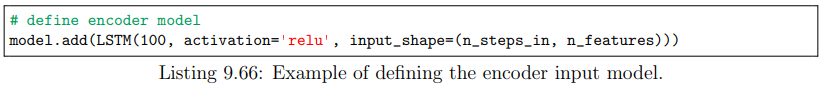

Bộ giải mã sử dụng đầu ra của encoder làm đầu vào. Đầu tiên, đầu ra có độ dài cố định của encoder được lặp lại, một lần cho time step cần thiết trong chuỗi đầu ra.

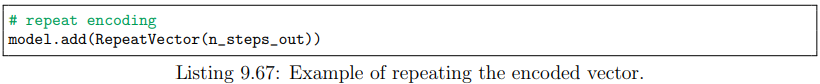

Trình tự này sau đó được cung cấp cho LSTM decoder model. Mô hình phải xuất ra một giá trị cho từng giá trị trong output time step, giá trị này có thể được diễn giải bằng một mô hình đầu ra duy nhất.

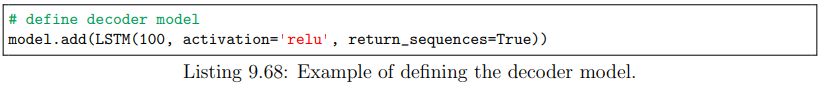

Sử dụng cùng một hoặc nhiều lớp đầu ra để thực hiện dự đoán từng bước trong chuỗi đầu ra. Điều này có thể đạt được bằng cách gói phần đầu ra của mô hình trong một trình bao bọc TimeDistributed.

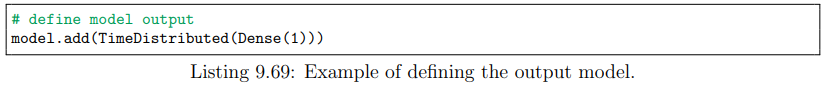

Định nghĩa đầy đủ về Encoder-Decoder model để dự báo multi-step time series được liệt kê bên dưới.

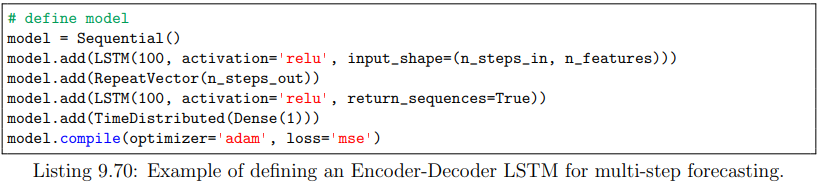

Giống như các LSTM models khác, dữ liệu đầu vào phải được định hình lại thành hình dạng ba chiều dự kiến ​​của [mẫu, dấu thời gian, tính năng].

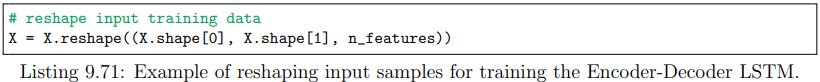

Trong trường hợp Encoder-Decoder model, đầu ra hoặc phần y của tập dữ liệu huấn luyện cũng phải có hình dạng này. Điều này là do mô hình sẽ dự đoán một time steps nhất định với một số tính năng nhất định cho mỗi mẫu đầu vào.

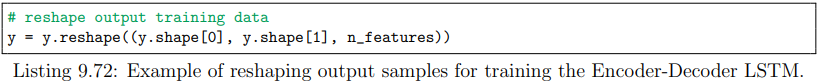

Ví dụ hoàn chỉnh về Encoder-Decoder LSTM để dự báo multi-step time series được liệt kê bên dưới.


In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Function to split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

# Reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))

# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=100, verbose=0)

# Demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[[100.30345]
  [114.77972]]]


### 9.5 Multivariate Multi-step LSTM Models




#### 9.5.1 Multiple Input Multi-step Output

Có thể sử dụng ba time steps trước của mỗi chuỗi thời gian đầu vào để dự đoán hai time steps của chuỗi thời gian đầu ra.

```python
"""
Input:
10, 15
20, 25
30, 35
Output:
65
85
"""
```

In [ ]:
from numpy import array, hstack

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)

# Summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(6, 3, 2) (6, 2)
[[10 15]
 [20 25]
 [30 35]] [65 85]
[[20 25]
 [30 35]
 [40 45]] [ 85 105]
[[30 35]
 [40 45]
 [50 55]] [105 125]
[[40 45]
 [50 55]
 [60 65]] [125 145]
[[50 55]
 [60 65]
 [70 75]] [145 165]
[[60 65]
 [70 75]
 [80 85]] [165 185]


Có thể phát triển LSTM model để multi-step predictions. Có thể sử dụng đầu ra vectơ hoặc encoder-decoder model. Trong trường hợp này, chúng ta sẽ sử dụng Stacked LSTM.

In [ ]:
from numpy import array, hstack
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# Convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# Horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# Choose a number of time steps for input and output
n_steps_in, n_steps_out = 3, 2

# Convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# The dataset knows the number of features, e.g., 2
n_features = X.shape[2]

# Define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))

model.compile(optimizer='adam', loss='mse')

# Fit model
model.fit(X, y, epochs=200, verbose=0)

# Demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[186.74527 209.1329 ]]


#### 9.5.2 Multiple Parallel Input and Multi-step Output

Chúng ta có thể sử dụng ba time steps cuối cùng của mỗi chuỗi thời gian trong số ba chuỗi thời gian làm đầu vào cho mô hình và dự đoán time steps tiếp theo của từng chuỗi thời gian trong số ba chuỗi thời gian làm đầu ra. Mẫu đầu tiên trong tập dữ liệu huấn luyện sẽ như sau.

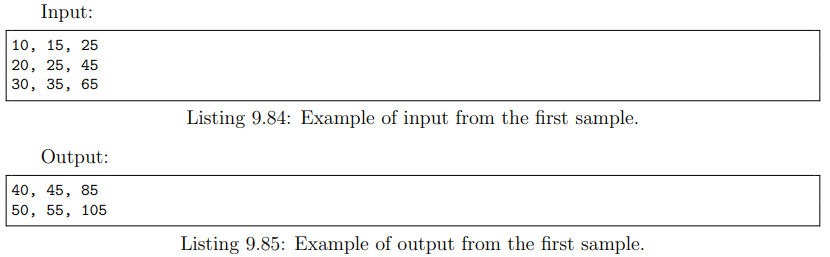

Split sequences() function bên dưới thực hiện hành vi này.

In [ ]:
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# print the shape of the resulting arrays
print(X.shape, y.shape)

# summarize the data
for i in range(len(X)):
    print(X[i], y[i])


(5, 3, 3) (5, 2, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]


Chúng ta có thể sử dụng Vector Output or Encoder-Decoder LSTM để mô hình hóa vấn đề này.

In [ ]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

# the dataset knows the number of features, e.g., 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=300, verbose=0)

# demonstrate prediction
x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[[ 90.065674  95.29613  185.65434 ]
  [100.11784  105.15975  206.61044 ]]]
